In [ ]:
import numpy as np
import sklearn
import sys
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

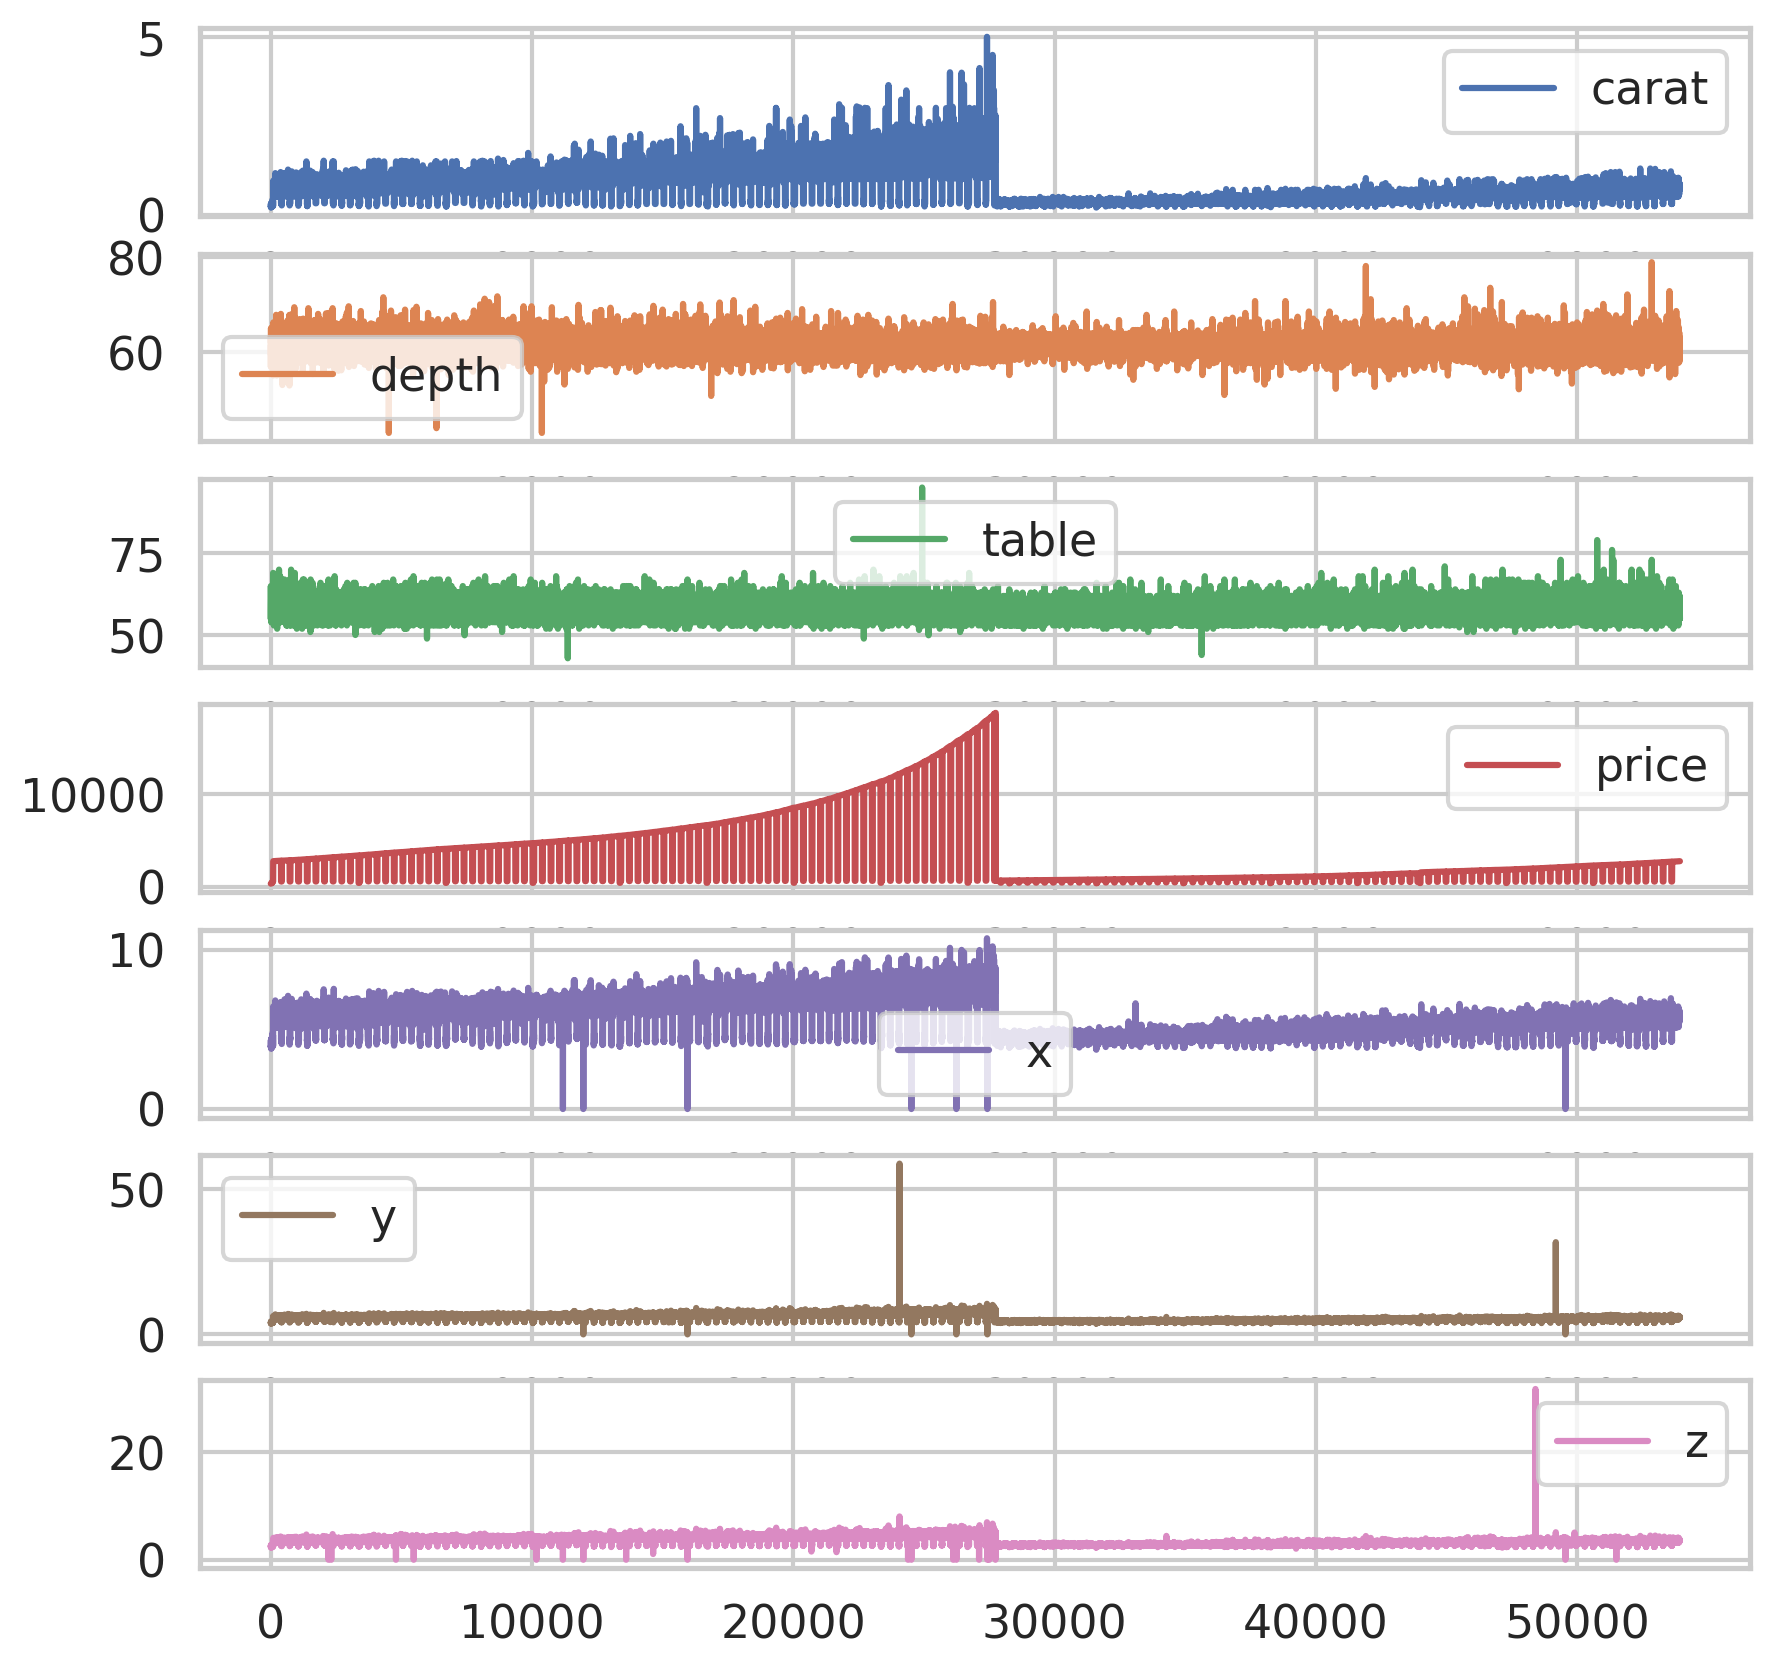

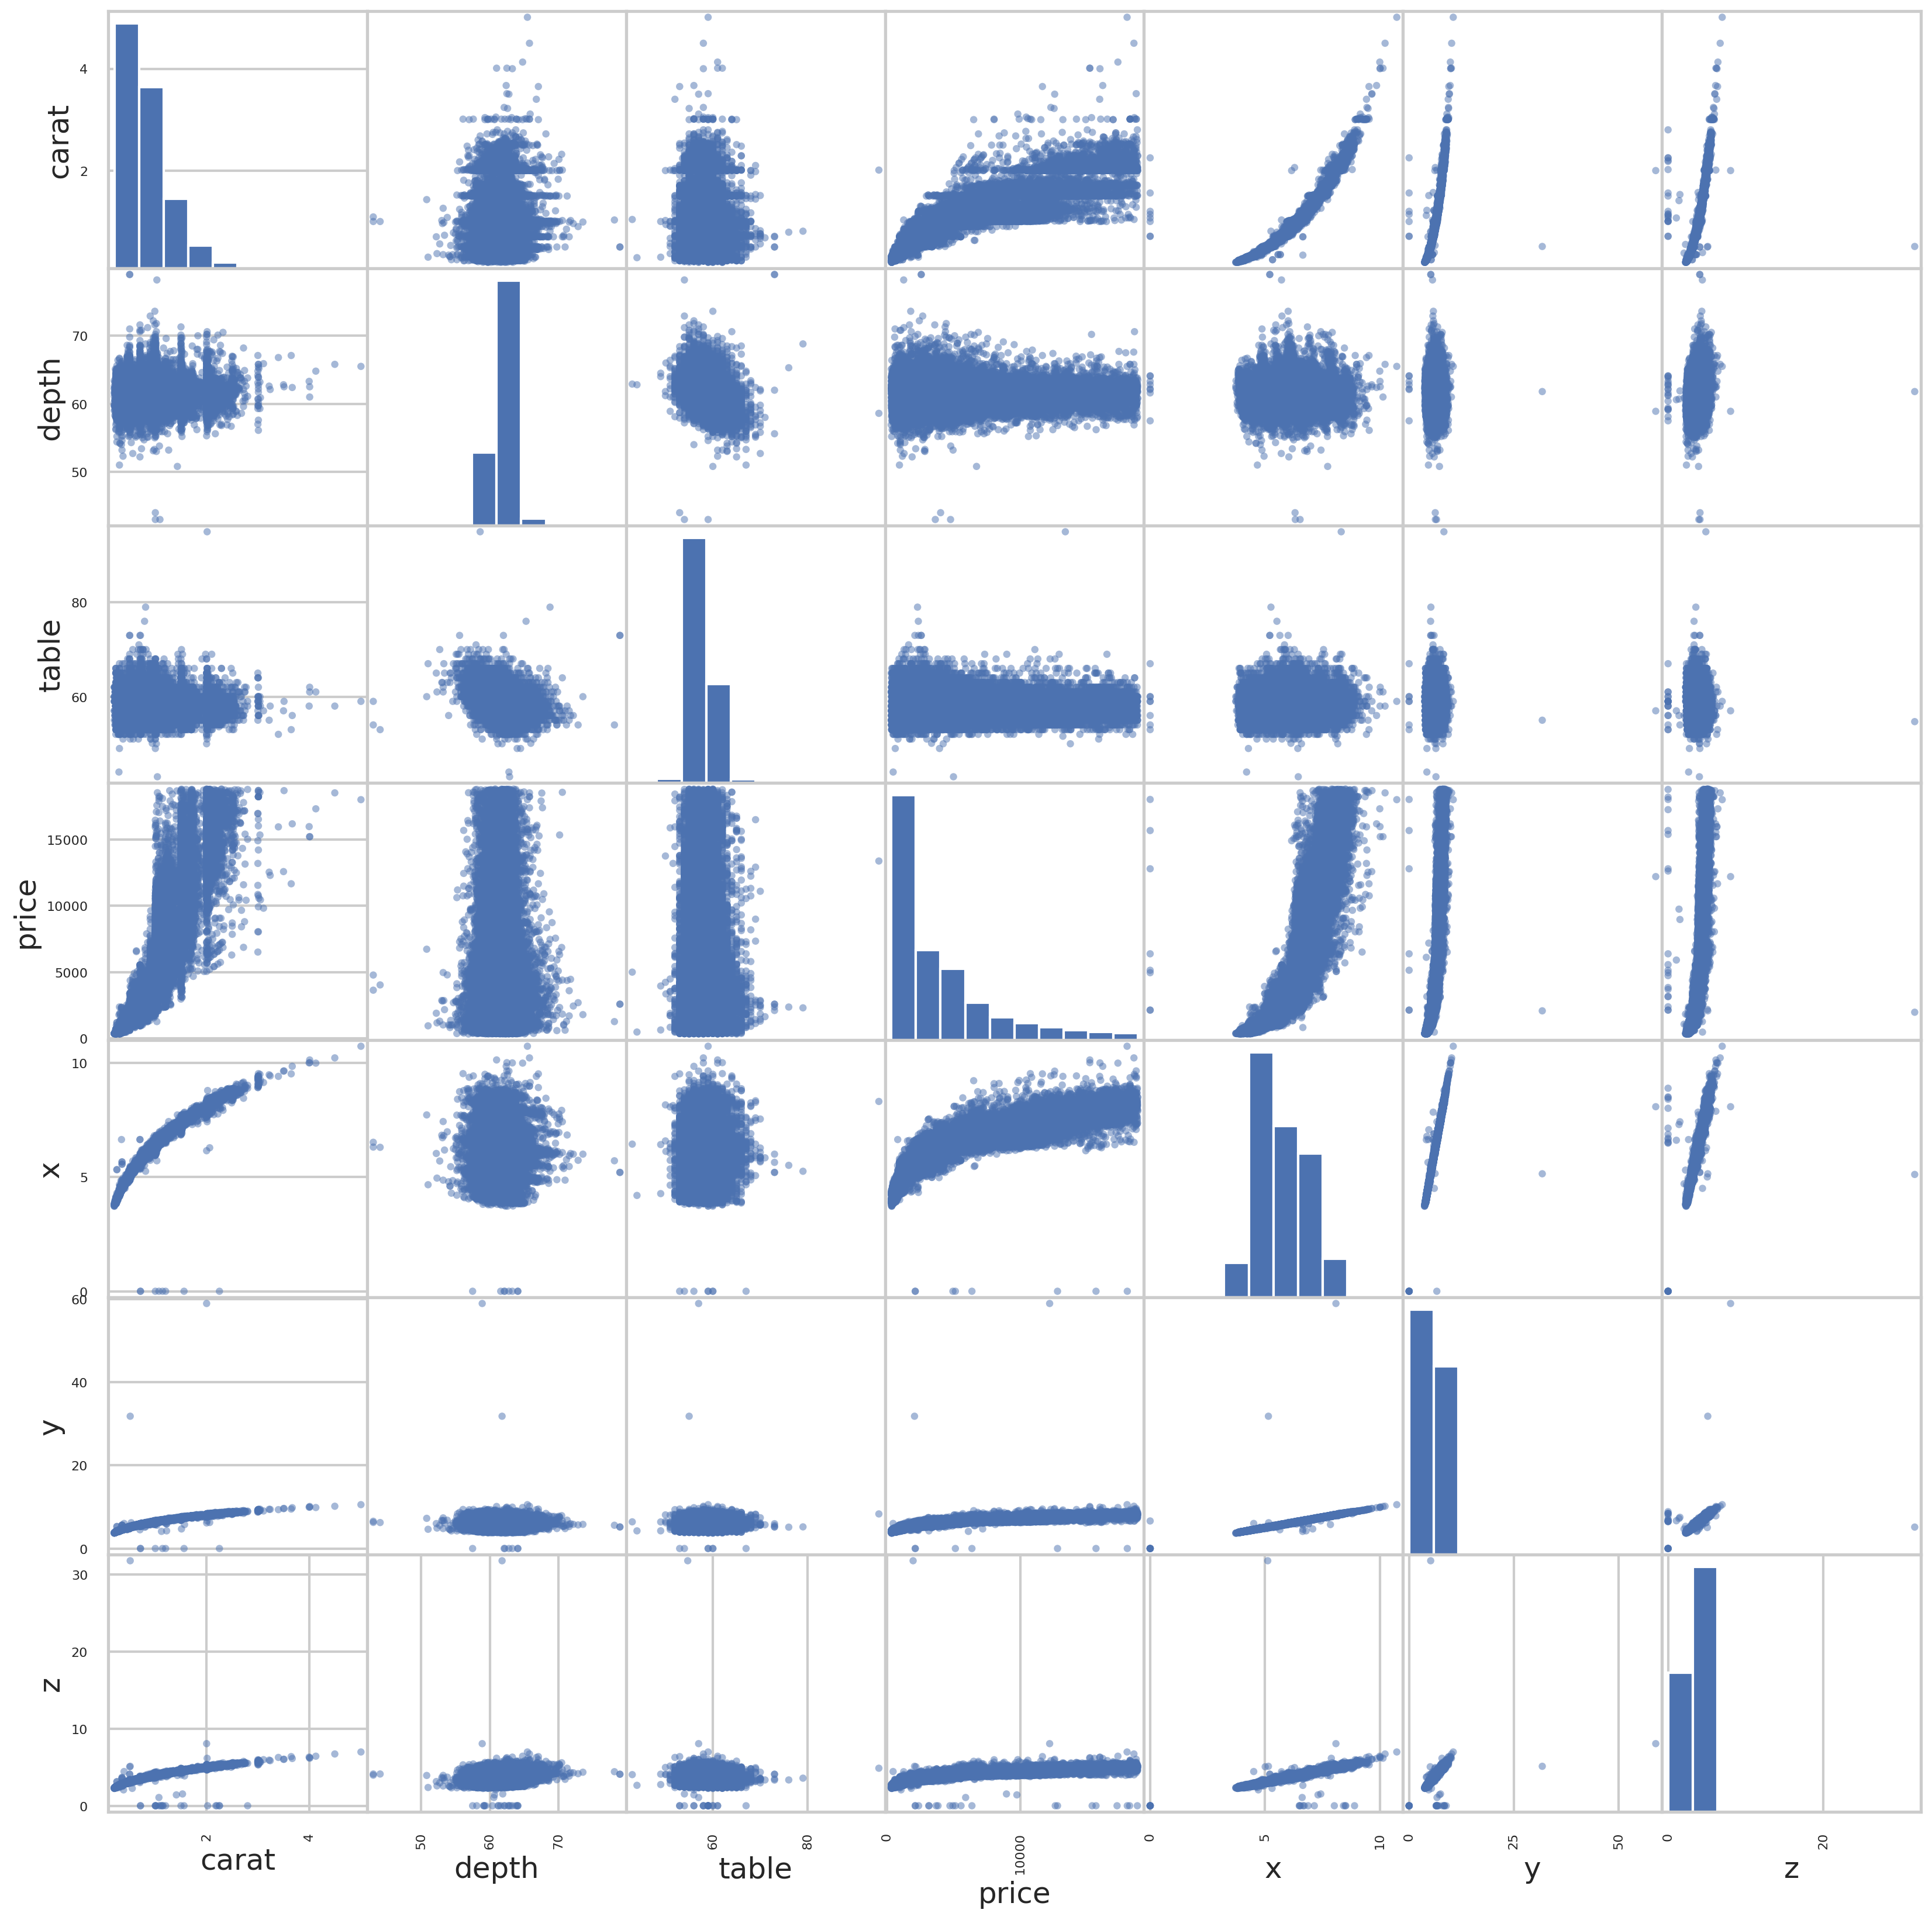

train data shape:  (10,)
test data shape:  (0,)
train label shape:  (10,)
test label shape:  (0,)


In [ ]:
names =['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']

dataset = read_csv('diamonds.csv')
plt.show()

#data visualisations
dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
plt.show()

#seperate the dataset
random.seed(123)

def seperate_data():
        A = dataset[0:47]
        tA = dataset[47:59]
        B = dataset[59:106]
        tB = dataset[106:118]
        C = dataset[118:165]
        tC = dataset[165:178]
        train = np.concatenate((A,B,C))
        test = np.concatenate((tA,tB,tC))
        return train,test

train_porcent = 80
test_porcent = 20
dataset = list(dataset)
random.shuffle(dataset)

Filetrain, Filetest = seperate_data()
train_x = np.array([i[:13] for i in Filetrain])
train_y = np.array([j[:13] for j in Filetrain])
test_x = np.array([i[:13] for i in Filetest])
test_y = np.array([j[:13] for j in Filetest])


print('train data shape: ', train_x.shape)
print('test data shape: ', test_x.shape)
print('train label shape: ', train_y.shape)
print('test label shape: ', test_y.shape)


#Multilayered Perceptron
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MLP(BaseEstimator, ClassifierMixin):
        def __init__(self, params=None):
                if (params == None):
                        self.inputLayer = 13
                        self.hiddenLayer = 7
                        self.outputLayer = 3
                        self.learningRate = 0.01
                        self.max_epochs = 178
                        self.BiasHiddenValue = -1
                        self.BiasOutputValue = -1
                        self.activation = self.activada['sigmoid']
                        self.deriv = self.derivada['sigmoid']
                else:
                        self.inputLayer = params['InputLayer']
                        self.hiddenLayer = params['HiddenLayer']
                        self.outputLayer = params['OutputLayer']
                        self.learningRate = params['LearningRate']
                        self.max_epochs = params['Epocas']
                        self.BiasHiddenValue = params['BiasHiddenValue']
                        self.BiasOutputValue = params['BiasOutputValue']
                        self.activation = self.ativacao[params['ActivationFunction']]
                        self.deriv = self.derivada[params['ActivationFunction']]

                'Starting Bias and Weights'
                self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
                self.WEIGHT_output = self.starting_weights(self.outputLayer, self.hiddenLayer)
                self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
                self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)])
                self.classes_number = 3

        pass

        def starting_weights(self, x, y):
                return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

        ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }

        derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }

        def Backpropagation_Algorithm(self, x):
                DELTA_output = []
                'stage1 - Error OutputLayer'
                ERROR_output = self.output - self.OUTPUT_L2
                DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

                arrayStore = []
                'Stage 2 - Update weights OutputLayer and HiddenLayer'
                for i in range(self.hiddenLayer):
                    for j in range(self.OutputLayer):
                        self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                        self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

                'Stage 3 - Error: HiddenLayer'
                delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)

                'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
                for i in range(self.OutputLayer):
                        for j in range(self.hiddenLayer):
                                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])

        def show_err_graphic(self,v_erro,v_epoca):
                plt.figure(figsize=(9,4))
                plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
                plt.xlabel("Number of Epochs")
                plt.ylabel("Squared error (MSE) ");
                plt.title("Error Minimization")
                plt.show()

        def predict(self, X, y):
                'Returns the predictions for every element of X'
                my_predictions = []
                'Forward Propagation'
                forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
                forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output

                for i in forward:
                        my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

                print(" Number of Sample  | Class |  Output |  Hoped Output  ")
                for i in range(len(my_predictions)):
                        if(my_predictions[i] == 0):
                                print("id:{}    | 1  |  Output: {}  ".format(i, my_predictions[i], y[i]))
                        elif(my_predictions[i] == 1):
                                print("id:{}    | 2    |  Output: {}  ".format(i, my_predictions[i], y[i]))
                        elif(my_predictions[i] == 2):
                                print("id:{}    | 3   |  Output: {}  ".format(i, my_predictions[i], y[i]))

                return my_predictions
        pass








